<h1 align="center" class="jp-toc-ignore" style="color: LightSeaGreen">Coder Mê Tài Chính</h1>

---
<table width="100%" style="border:0px;">
    <tr style="font-size: 14pt">
        <td><b>Evangelist:</b> Lê Minh Đạt</td>
        <td><b>Email:</b> <a href="mailto:sirminhdat@gmail.com">sirminhdat@gmail.com</a></td>
        <td><b>Zalo:</b> 0919 564 515</td>
    </tr>
</table>

<center><h1 class="jp-toc-ignore"><b>Machine Learning Cơ Bản</b></h1></center>

<center>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">Hồi Quy Logistic</h1>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">(Logistic Regression)</h1>
</center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import helpers

<h3>Dùng Linear Regression để phân loại</h3>

X train: [0 1 2 4 5 6 7]
y train: [0 0 0 1 1 1 1]
Prediction: [-0.03408532  0.1401835   0.31445231  0.66298993  0.83725874  1.01152755
  1.18579636]


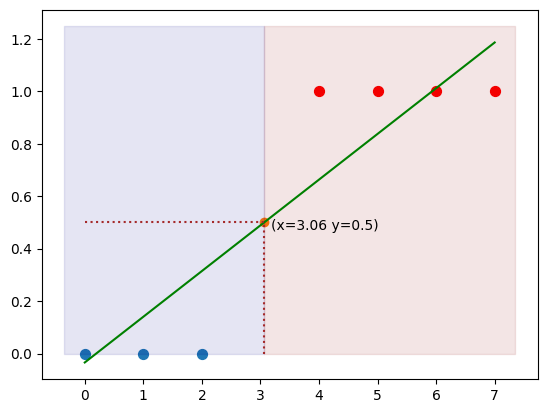

In [7]:
x_train = np.array([0, 1, 2, 4, 5, 6, 7])
y_train = np.array([0, 0, 0, 1, 1, 1, 1])
helpers.plot_linear_regression_zero_one(x_train, y_train)

X train: [ 0  1  2  3  4  5  7 10 25]
y train: [0 0 0 1 0 1 1 0 1]
Prediction: [0.18829224 0.22362097 0.2589497  0.29427843 0.32960716 0.36493589
 0.43559335 0.54157954 1.07151049]


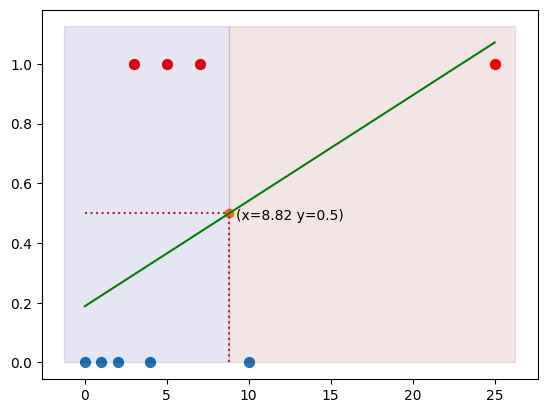

In [8]:
x_train2 = np.array([0, 1, 2, 3, 4, 5, 7, 10, 25])
y_train2 = np.array([0, 0, 0, 1, 0, 1, 1, 0, 1])
helpers.plot_linear_regression_zero_one(x_train2, y_train2)

<h3>Khái niệm Odds</h3>

$$
\large Odds=\frac{p}{1-p}
$$

Odds là tỉ lệ cược đối với một sự kiện cụ thể mà ta quan tâm (positive event). $p$ là xác suất của cái sự kiện mình quan tâm nó xảy ra.

<i>
Ví dụ:

Giả sử, đội tuyển Việt Nam và đội tuyển Nhật đá với nhau. Tỉ lệ Việt Nam thắng là 10% và Nhật thắng là 90% (đồng nghĩa tỉ lệ Việt Nam thua là 90%). 

- Nếu mình quan tâm đến sự kiện tuyển Việt Nam thắng thì khi đó $p = 10\% \Rightarrow Odds = \dfrac{10}{90}$
- Nếu mình quan tâm đến sự kiện tuyển Nhật thắng thì khi đó $p = 90\% \Rightarrow Odds = \dfrac{90}{10}$

**Quy ước**: Luôn luôn đặt cái label $1$ cho cái positive event và label $0$ cho sự kiện ngược lại
</i>

Ông "tổ" của mô hình Logistic Regression là cụ David R. Cox (1924 - 2022)
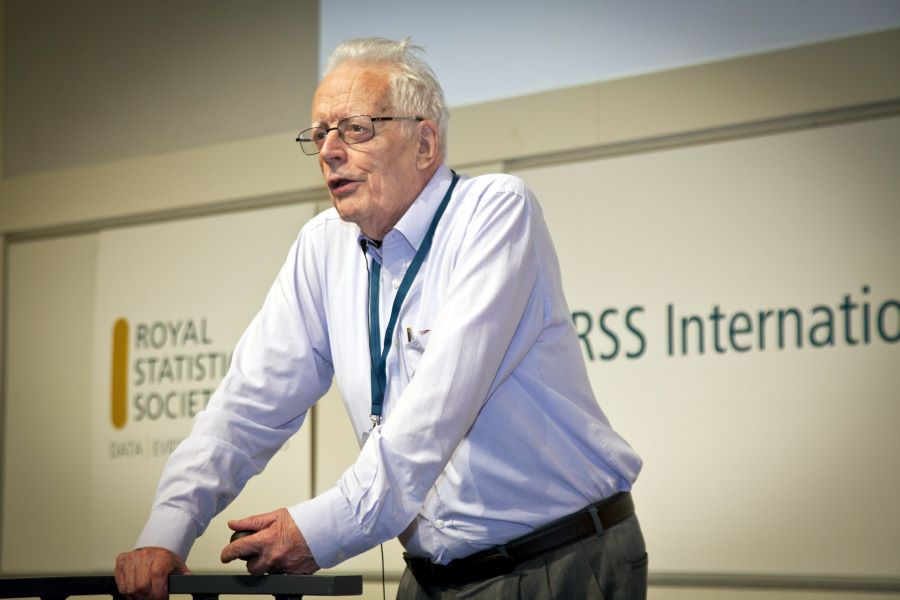

https://content.ems.press/assets/public/full-texts/serials/mag/124/5846434/json/mag-86.json.media/mag-86-1.jpg

David R. Cox đã đưa ra một khái niệm Logit như sau:

$$
\Large logit(p) = log(Odds) = \log{\biggl(\frac{p}{1-p}\biggr)}
$$

Khi đó, người ta giả định là:

$$
\Large logit(p) = w_0x_0 + w_1x_1 + \cdots + w_nx_n + b = \mathbf{w} \cdot \mathbf{x} + b
$$

$$
\Large \Rightarrow \log{\biggl(\frac{p}{1-p}\biggr)} = \mathbf{w} \cdot \mathbf{x} + b
$$

<h3>Hàm Sigmoid</h3>

Đặt $z=\mathbf{w} \cdot \mathbf{x} + b$

$$
\Large \Rightarrow \log{\biggl(\frac{p}{1-p}\biggr)} = z
$$

$e$ mũ hai vế:

$$
\Large \frac{p}{1-p}=e^z
$$

Note: 
- $ln(a)=b\Leftrightarrow a=e^b$
- $e^{ln(a)}=a$
- $ln(e^a)=a$

$$
\Large \Leftrightarrow p=(1-p)e^z
$$

$$
\Large \Leftrightarrow p(1+e^z)=e^z
$$

$$
\Large \Leftrightarrow p=\frac{e^z}{(1+e^z)}
$$

$$
\Large \Leftrightarrow p=\frac{\dfrac{e^z}{e^z}}{\dfrac{(1+e^z)}{e^z}}
$$

$$
\Large \Leftrightarrow p=\frac{1}{1 + \dfrac{1}{e^z}}
$$

$$
\Large \Leftrightarrow p=\frac{1}{1 + e^{-z}}
$$

Đặt $p=\sigma(z)$

$$
\Large \Rightarrow\sigma(z)=\frac{1}{1 + e^{-z}}  \tag{Sigmoid function}
$$

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
def plot_sigmoid():
    arr_z = np.arange(-8, 8, 0.1)
    arr_sigmaz = sigmoid(arr_z)

    plt.plot(arr_z, arr_sigmaz, color='red')
    plt.axvline(0.0, alpha=0.5)
    plt.yticks([0.0, 0.5, 1.0])
    plt.xlabel('z')
    plt.ylabel(r"$p=\sigma(z)$")
    plt.gca().yaxis.grid(True)
    plt.show()

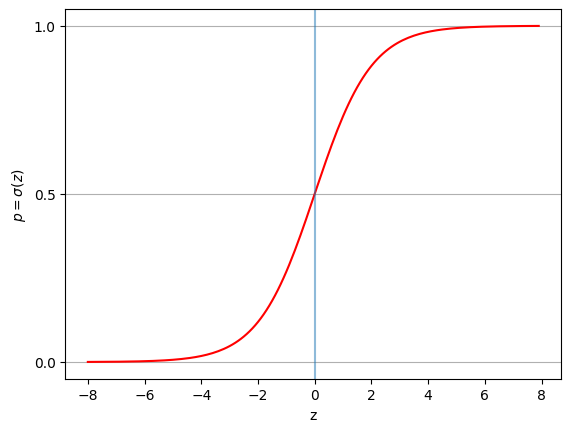

In [11]:
plot_sigmoid()

<h3>Cost function</h3>

Giả định rằng, các mẫu quan sát trong tập dữ liệu của mình là độc lập với nhau từng cái một (nghĩa là mẫu thứ i khi nó xuất hiện trong thực tế hoàn toàn độc lập với sự xuất hiện của các mẫu còn lại trong tập dữ liệu)

Với giả định trên, bây giờ người ta mới đặt hai câu hỏi như sau:
1. Với những giá trị $\mathbf{x}, y$ mà ta có được trong thực tế, sau đó ta tìm được bộ tham số $\mathbf{w}, b$ này. Vậy khả năng (Likelihood) mà $\mathbf{w}, b$ này nó giống với cái $\mathbf{w}^*, b^*$ (thật sự) là bao nhiêu

$$
\Large \mathcal{L}(\mathbf{w}, b \mid \mathbf{x}, y)
$$

2. Với giá trị $\mathbf{w}, b$ mà ta ước lượng cùng với bộ dữ liệu $\mathbf{x}$ có được thì xác suất mà cái dữ liệu $\hat{y}$ nó giống với $y$ thực tế (quan sát được) là bao nhiêu

$$
\Large p(y \mid \mathbf{x}, \mathbf{w}, b)
$$

 - Nếu ta có $m$ quan sát thì xác suất để $m$ quan sát này xuất hiện đồng thời và độc lập với nhau là:

$$
\Large p(y \mid \mathbf{x}, \mathbf{w}, b)=\prod_{i=1}^{m} p(y^{(i)} \mid \mathbf{x}^{(i)}, \mathbf{w}, b)
$$

Từ đó, ta có:

$$
\Large \mathcal{L}(\mathbf{w}, b \mid \mathbf{x}, y)=p(y \mid \mathbf{x}, \mathbf{w}, b)=\prod_{i=1}^{m} p(y^{(i)} \mid \mathbf{x}^{(i)}, \mathbf{w}, b)
$$

Xét $p(y^{(i)} \mid \mathbf{x}^{(i)}, \mathbf{w}, b)$:

Giá trị của $y^{(i)}$ chỉ có thể:

$$
\begin{align}
\Large y^{(i)}&=1 : \Large p(y^{(i)}=1 \mid \mathbf{x}^{(i)}, \mathbf{w}, b)=\sigma(z^{(i)})\\ \\
\Large y^{(i)}&=0 : \Large p(y^{(i)}=0 \mid \mathbf{x}^{(i)}, \mathbf{w}, b)=1 - \sigma(z^{(i)})
\end{align}
$$

Với: $z^{(i)} = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$

$$
\Large \Rightarrow p(y^{(i)} \mid \mathbf{x}^{(i)}, \mathbf{w}, b) = \bigl[\sigma(z^{(i)})\bigr]^{y^{(i)}} \bigl[1-\sigma(z^{(i)})\bigr]^{1-y^{(i)}}
$$

Khi đó:

$$
\Large \mathcal{L}(\mathbf{w}, b \mid \mathbf{x}, y) = p(y \mid \mathbf{x}, \mathbf{w}, b)=\prod_{i=1}^{m} \bigl[\sigma(z^{(i)})\bigr]^{y^{(i)}} \bigl[1-\sigma(z^{(i)})\bigr]^{1-y^{(i)}}
$$

Lấy log 2 vế để chuyển một tích sang một tổng:

$$
\Large log (\mathcal{L}(\mathbf{W}, b \mid \mathbf{X}, y)) = \sum_{i=1}^{m} log \bigl( \bigl[\sigma(z^{(i)})\bigr]^{y^{(i)}} \bigl[1-\sigma(z^{(i)})\bigr]^{1-y^{(i)}}\bigr)
$$

$$
\Large \Leftrightarrow log (\mathcal{L}(\mathbf{W}, b \mid \mathbf{X}, y)) = \sum_{i=1}^{m} log \bigl( \bigl[\sigma(z^{(i)})\bigr]^{y^{(i)}}\bigr) + log \bigl( \bigl[1-\sigma(z^{(i)})\bigr]^{1-y^{(i)}}\bigr)
$$

$$
\Large \Leftrightarrow log (\mathcal{L}(\mathbf{W}, b \mid \mathbf{X}, y)) = \sum_{i=1}^{m} \biggl( y^{(i)} log \bigl[ \sigma(z^{(i)})\bigr] + (1-y^{(i)})log \bigl[ 1-\sigma(z^{(i)}) \bigr] \biggr)
$$

Maximize vế trái, đồng nghĩa với việc minimize giá trị âm của vế phải:

$$
\Large \max_{\mathbf{w},b} log (\mathcal{L}(\mathbf{w}, b \mid \mathbf{x}, y)) = \min_{\mathbf{w},b} -\sum_{i=1}^{m} \biggl( y^{(i)} log \bigl[ \sigma(z^{(i)})\bigr] + (1-y^{(i)})log \bigl[ 1-\sigma(z^{(i)}) \bigr] \biggr)
$$

<i>
Ví dụ:
    
khoảng giá trị: [-10, +10]
    
max = +10

min = -10 = -(+10) = -(max)
</i>

Khi đó hàm cost $J(\mathbf{w},b)$ là:

$$
\Large J(\mathbf{w},b)= \frac{1}{m}\sum_{i=1}^{m} \biggl( -y^{(i)} log \bigl[ \sigma(z^{(i)})\bigr] - (1-y^{(i)})log \bigl[ 1-\sigma(z^{(i)}) \bigr] \biggr)
$$

In [12]:
def compute_logistic_cost(X, y_vector, w_vector, b):

    m_samples = X.shape[0]
    sum_cost = 0

    for i in range(m_samples):
        zi = w_vector.dot(X[i]) + b
        sigma_z = sigmoid(zi)
        loss = -(y_vector[i] * np.log(sigma_z)) - (1 - y_vector[i]) * np.log(1 - sigma_z)
        sum_cost += loss

    j_wb = sum_cost / m_samples
    return j_wb

In [13]:
w_tmp = np.array([1, 3])
b_tmp = -5
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
print(compute_logistic_cost(X_train, y_train, w_tmp, b_tmp))

0.3642919388579349


In [14]:
def plot_logistic_cost():
    z = np.arange(-20, 20, 0.1)
    sigma_z = sigmoid(z)
    cost_zero = []
    cost_one = []
    for zi in sigma_z:
        cost_one.append(-np.log(zi))
        cost_zero.append(-np.log(1 - zi))
        
    plt.plot(sigma_z, cost_one, label="$J(\mathbf{w}, b)$ if y=1")
    plt.plot(sigma_z, cost_zero, ls='--', color='r', label="$J(\mathbf{w}, b)$ if y=0")
    plt.ylim(0.0, 6.1)
    plt.xlim([0, 1])
    plt.xticks([0.0, 0.5, 1.0])
    plt.xlabel("$\sigma(z)$")
    plt.ylabel("$J(\mathbf{w}, b)$")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

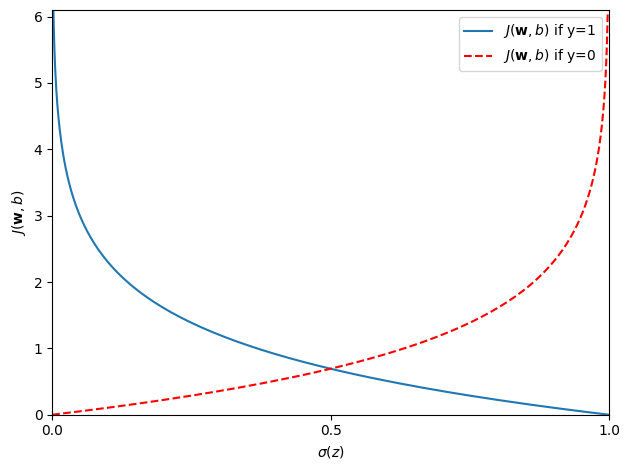

In [15]:
plot_logistic_cost()

<h3>Gradient Descent</h3>

<h4>Khai triển đạo hàm của hàm $J(\mathbf{w},b)$ sử dụng Chain Rule</h4>

- $z^{(i)} = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$
- $\hat{y}^{(i)} = \sigma(z^{(i)})=\dfrac{1}{1+e^{-z}}$

$$
\Large J(\mathbf{w},b)= \frac{1}{m}\sum_{i=1}^{m} \biggl( -y^{(i)} log \bigl[ \hat{y}^{(i)}\bigr] - (1-y^{(i)})log \bigl[ 1-\hat{y}^{(i)} \bigr] \biggr)
$$

Đặt:

$$
\Large L(\hat{y})^{(i)}=-y^{(i)} log \bigl[ \hat{y}^{(i)}\bigr] - (1-y^{(i)})log \bigl[ 1-\hat{y}^{(i)} \bigr]
$$

<h4>Tính $\dfrac{\partial{L}}{\partial{w_j}}$</h4>

$$
\Large \frac{\partial{L}}{\partial{w_j}}=\frac{\partial{L}}{\partial{\hat{y}}} \times \frac{\partial{\hat{y}}}{\partial{z}} \times \frac{\partial{z}}{\partial{w_j}}
$$

Tính $\dfrac{\partial{L}}{\partial{\hat{y}}}$:

$$
\Large L(\hat{y})^{(i)}=-y^{(i)} log \bigl[ \hat{y}^{(i)}\bigr] - (1-y^{(i)})log \bigl[ 1-\hat{y}^{(i)} \bigr]
$$

Note:
- $(ln(x))'=\dfrac{1}{x}$
- $(ln(u))'=\dfrac{u'}{u}$

$$
\begin{align}
\Large \dfrac{\partial{L}}{\partial{\hat{y}}}&= \Large -y\frac{1}{\hat{y}} - (1-y)\frac{-1}{1-\hat{y}} \\ \\
\Large \Leftrightarrow \dfrac{\partial{L}}{\partial{\hat{y}}} &= \Large -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} \\ \\
\Large \Leftrightarrow \dfrac{\partial{L}}{\partial{\hat{y}}} &= \Large \frac{-y + y\hat{y}+\hat{y}-y\hat{y}}{\hat{y}(1-\hat{y})} \\ \\
\Large \Leftrightarrow \dfrac{\partial{L}}{\partial{\hat{y}}} &= \Large \frac{\hat{y}-y}{\hat{y}(1-\hat{y})}
\end{align}
$$



Tính $\dfrac{\partial{\hat{y}}}{\partial{z}}$:

$$
\Large \hat{y}^{(i)} = \sigma(z^{(i)})=\dfrac{1}{1+e^{-z}}
$$

Note: 
- $\bigl(\dfrac{1}{u}\bigr)'=-\dfrac{u'}{u^2}$
- $\bigl(e^{u}\bigr)'=u'.e^{u}$

$$
\begin{align}
\Large \frac{\partial{\hat{y}}}{\partial{z}} &= \Large -\frac{-(e^{-z})}{(1+e^{-z})^2} \\ \\
\Large \Leftrightarrow \frac{\partial{\hat{y}}}{\partial{z}} &= \Large \frac{e^{-z}}{(1+e^{-z})^2} \\ \\
\Large \Leftrightarrow \frac{\partial{\hat{y}}}{\partial{z}} &= \Large \frac{(1 + e^{-z}) - 1}{(1+e^{-z})^2} \\ \\
\Large \Leftrightarrow \frac{\partial{\hat{y}}}{\partial{z}} &= \Large \frac{1 + e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2} \\ \\
\Large \Leftrightarrow \frac{\partial{\hat{y}}}{\partial{z}} &= \Large \frac{1}{(1+e^{-z})} - \biggl[\frac{1}{(1+e^{-z})}\biggr]^2 \\ \\
\Large \Leftrightarrow \frac{\partial{\hat{y}}}{\partial{z}} &= \Large \sigma(z) - [\sigma(z)]^2 \\ \\
\Large \Leftrightarrow \frac{\partial{\hat{y}}}{\partial{z}} &= \Large \sigma(z)[1 - \sigma(z)]
\end{align}
$$


Tính $\dfrac{\partial{z}}{\partial{w_j}}$:
$$
\Large z = \mathbf{w} \cdot \mathbf{x} + b=w_0x_0 + w_1x_1 + \cdots + w_nx_n + b
$$

$$
\Large \dfrac{\partial{z}}{\partial{w_j}}=x_j
$$

Suy ra, đạo hàm của $L$ theo $\mathbf{w}$:
$$
\begin{align}
\Large \frac{\partial{L}}{\partial{w_j}} &= \Large \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} \times \sigma(z)[1 - \sigma(z)] \times x_j \\ \\
\Large \Leftrightarrow \frac{\partial{L}}{\partial{w_j}} &= \Large \frac{\sigma(z)-y}{\sigma(z)[1-\sigma(z)]} \times \sigma(z)[1 - \sigma(z)] \times x_j \\ \\
\Large \Leftrightarrow \frac{\partial{L}}{\partial{w_j}} &= \Large [\sigma(z)-y] \times x_j \quad\quad \large j = [0 .. n-1]
\end{align}
$$

<h4>Tính $\dfrac{\partial{L}}{\partial{b}}$:</h4>

$$
\Large \frac{\partial{L}}{\partial{b}}=\frac{\partial{L}}{\partial{\hat{y}}} \times \frac{\partial{\hat{y}}}{\partial{z}} \times \frac{\partial{z}}{\partial{b}}
$$

$$
\Large \Leftrightarrow \frac{\partial{L}}{\partial{b}}= [\sigma(z)-y]
$$

Suy ra, đạo hàm của hàm $J$ theo $\mathbf{w},b$:
$$
\begin{align}
\Large  \frac{\partial J(\mathbf{w},b)}{\partial w_j} =& \Large \frac{1}{m}\sum_{i=1}^{m} \bigl[\sigma(z^{(i)})-y^{(i)}\bigr]x_{j}^{(i)} \quad\quad \large j = [0 .. n-1] \\ \\
\Large \frac{\partial J(\mathbf{w},b)}{\partial b} =& \Large \frac{1}{m}\sum_{i=1}^{m} \bigl[\sigma(z^{(i)})-y^{(i)}\bigr]
\end{align}
$$

In [16]:
def compute_logistic_partial_derivative(X, y_vector, w_vector, b):
    m_samples, n_features = X.shape
    dj_w = np.zeros(n_features)
    dj_b = 0

    for i in range(m_samples):
        zi = w_vector.dot(X[i]) + b
        sigma_z = sigmoid(zi)
        dj_b += (sigma_z - y_vector[i])
        for j in range(n_features):
            dj_w[j] += (sigma_z - y_vector[i]) * X[i, j]            
                
    dj_dw = dj_w / m_samples # dj_dw có shape(n,): mỗi phần tử của dj_dw là giá trị đạo hàm tương ứng của mỗi w trong w_vector
    dj_db = dj_b / m_samples # dj_db là số thực
    return dj_dw, dj_db

Cập nhật $w_j$, $b$ cho đến khi đạo hàm của $J_{w_j}(w,b)$ và $J_{b}(w,b)$ đạt cực tiểu (hoặc hội tụ) với $\eta$ (đọc là eta) là learning rate

$$
\begin{align}
\Large w_j &= \Large w_j - \eta \frac{\partial J(\mathbf{w},b)}{\partial w_j} \quad\quad \large j = [0 .. n-1] \\ \\
\Large b &= \Large b - \eta \frac{\partial J(\mathbf{w},b)}{\partial b} \\
\end{align}
$$

In [17]:
def compute_logistic_gradient_descent(X, y, n_iters=1000, w_init=None, b_init=0, eta=0.01):
    _, n_features = X.shape
    w = np.zeros(n_features)
    b = b_init
    
    cost_hist = [] # Lưu cost ở từng bước thứ i
    wb_hist = [] # Lưu {w, b} ở từng bước thứ i
    dj_hist = [] # Lưu {dj_dw, dj_db} ở từng bước thứ i

    threshold = 10e4 # Ngưỡng giá trị để không lưu cost, wb, dj nếu như n_iters lớn hơn giá trị này, tránh bị tốn RAM
    
    if w_init != None:
        w = w_init

    for i in range(int(n_iters)):
        dj_dw, dj_db = compute_logistic_partial_derivative(X, y, w, b)
        w = w - eta * dj_dw # Cập nhật giá trị mới cho w
        b = b - eta * dj_db # Cập nhật giá trị mới cho b
        cur_cost = compute_logistic_cost(X, y, w, b)
        if i < threshold:
            cost_hist.append(cur_cost)
            wb_hist.append({'w': w, 'b': b})
            dj_hist.append({'w': {'dj_dw': dj_dw, 'eta*dj_dw': (eta * dj_dw)}, 'b': {'dj_db': dj_db, 'eta*dj_db': (eta * dj_db)}})

        # In các giá trị của cost, w, b, đạo hàm tại các bước
        if i % np.ceil(n_iters/10) == 0:
                print(f"Step {i:4}:")
                print(f"\tCost: {cur_cost}")
                print(f"\tdj_dw: {dj_dw}\tdj_db: {dj_db}")
                print(f"\tw: {w}\tb: {b}")           

    trace = { 
        'cost': cost_hist,
        'wb': wb_hist,
        'dj': dj_hist
    }
    return w, b, trace

In [18]:
_w, _b, trace = compute_logistic_gradient_descent(X_train, y_train)

Step    0:
	Cost: 0.6922493145189493
	dj_dw: [-0.25       -0.16666667]	dj_db: 0.0
	w: [0.0025     0.00166667]	b: 0.0
Step  100:
	Cost: 0.6507099182062028
	dj_dw: [-0.10772795 -0.05508215]	dj_db: 0.08114777675179437
	w: [0.16543179 0.09922341]	b: -0.05014653558288621
Step  200:
	Cost: 0.6333095898396446
	dj_dw: [-0.06747148 -0.02846335]	dj_db: 0.10096802165431952
	w: [0.24898437 0.13770963]	b: -0.14360533027278033
Step  300:
	Cost: 0.6183897520400041
	dj_dw: [-0.05377016 -0.02315836]	dj_db: 0.10504173958505673
	w: [0.30846869 0.16268331]	b: -0.24724789977961115
Step  400:
	Cost: 0.6042717326873527
	dj_dw: [-0.04772302 -0.02326142]	dj_db: 0.10484098239731837
	w: [0.35885531 0.18569906]	b: -0.35235789254301847
Step  500:
	Cost: 0.5907463749601048
	dj_dw: [-0.04416832 -0.02453274]	dj_db: 0.1034761854489572
	w: [0.40466423 0.20957405]	b: -0.45655445260509636
Step  600:
	Cost: 0.5777411300436892
	dj_dw: [-0.04159802 -0.02584445]	dj_db: 0.10181988126204002
	w: [0.44747997 0.23478301]	b: -0.55

<h3>Tổng hợp lại vào một class</h3>

In [20]:
class ViiLogisticRegression:
    """
    Parameters:
        n_iters (int) : Number of iterations
        eta (float) : Learning rate
        w (numpy.ndarray(n,)) : Model parameter
        b (scalar) : Model parameter
    """
    
    def __init__(self, n_iters=10000, eta=0.01):
        self.n_iters = int(n_iters)
        self.eta = eta
        self.w = None
        self.b = None

    def fit(self, X, y):
        _w, _b = self._compute_gradient_descent(X, y)
        self.w = _w
        self.b = _b

    def predict(self, X, threshold=0.5):
        preds = np.where(self.proba(X) >= threshold, 1, 0)
        return preds

    def proba(self, X):
        z = X.dot(self.w) + self.b
        return self._sigmoid(z)        

    def accuracy(self, preds, y_test):
        total_correct = np.sum(y_test == preds)
        accuracy = total_correct / len(y_test)
        return accuracy
    
    #==========================================
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def _compute_cost(self, X, y_vector, w_vector, b):
        """
        Parameters:
            X (numpy.ndarray(m,n)): Feature data with m samples (observations) and n features (columns)
            y_vector (numpy.ndarray(m,)): Target values
            w_vector (numpy.ndarray(n,)):  Model parameter
            b (scalar): Model parameter
    
        Return:
            j_wb (float): The cost of using parameters w_vector, b for linear regression
                   to fit the data points in X and y_vector
        """
        sigma_z = self._sigmoid(X.dot(w_vector) + b)
        j_wb = np.mean(-(y_vector * np.log(sigma_z)) - (1 - y_vector) * np.log(1 - sigma_z))
        return j_wb

    def _compute_partial_derivative(self, X, y_vector, w_vector, b):
        """
        Parameters:
            X (numpy.ndarray(m,n)): Feature data with m samples (observations) and n features (columns)
            y_vector (numpy.ndarray(m,)): Target values
            w_vector (numpy.ndarray(n,)):  Model parameter
            b (scalar): Model parameter
    
        Return:
            dj_dw (ndarray (n,)): The derivative value with respect to w
            dj_db (scalar): The derivative value with respect to b  
        """
        m_samples = X.shape[0]        

        dj_b = self._sigmoid(X.dot(w_vector) + b) - y_vector # dj_b có shape(m,)
        dj_w = np.dot(X.T, dj_b) # dj_w has có shape(n,)

        dj_dw = dj_w / m_samples # dj_dw có shape(n,): mỗi phần tử của dj_dw là giá trị đạo hàm tương ứng của mỗi w trong w_vector
        dj_db = dj_b.mean() # dj_db là số thực
        return dj_dw, dj_db

    def _compute_gradient_descent(self, X, y_vector):
        """
        Parameters:
            X (numpy.ndarray(m,n)) : Feature data with m samples (observations)
            y_vector (numpy.ndarray(m,)) : Target values
    
        Return:
            w (numpy.ndarray(n,)) : Updated values of parameters w
            b (scalar) : Updated value of parameter b            
        """
        _, n_features = X.shape
        w = np.zeros(n_features)
        b = 0
                
        for _ in range(self.n_iters):
            dj_dw, dj_db = self._compute_partial_derivative(X, y_vector, w, b)
            w = w - self.eta * dj_dw # Cập nhật giá trị mới cho w
            b = b - self.eta * dj_db # Cập nhật giá trị mới cho b

        return w, b

<h3>Train và Test Model</h3>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv("data/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X_data = df.drop(columns='Outcome',axis=1).to_numpy()
y_data = df['Outcome'].to_numpy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=2024)

In [26]:
_n_iters = 10000
_eta = 0.005
log_model = ViiLogisticRegression(n_iters=_n_iters, eta = _eta)
log_model.fit(X_train, y_train)
preds = log_model.predict(X_test) # threshold mặc định là 0.5
proba = log_model.proba(X_test)
accuracy = log_model.accuracy(preds, y_test)
print(f"y_test: {y_test}")
print(f"Prediction: {preds}")
print(f"Probability: {np.round(proba, 3)}")
print(f"Accuracy: {(accuracy * 100):.2f}%")

y_test: [0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 1 0 0 1 0]
Prediction: [1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0]
Probability: [0.999 1.    1.    0.983 0.